# Aula 5 - Análise de Dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
dados = pd.read_json('../bases/jiujitsu.ndjson', lines=True)
dados = pd.json_normalize(dados['data'])

colunas_desejadas = ['id', 'desc', 'challenges', 'createTime', 'video.duration', 'video.cover', 'author.id',
                    'author.nickname', 'author.uniqueId','author.verified', 'music.title', 'authorStats.followingCount',
                    'authorStats.followerCount', 'authorStats.heartCount', 'authorStats.videoCount',
                    'authorStats.diggCount', 'authorStats.heart', 'statsV2.collectCount', 'statsV2.commentCount',
                    'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount']

dados = dados[colunas_desejadas]
dados['createTime'] = pd.to_datetime(dados['createTime'], unit='s')

dados['statsV2.diggCount'] = dados['statsV2.diggCount'].astype(float)
dados['statsV2.playCount'] = dados['statsV2.playCount'].astype(float)
dados['statsV2.shareCount'] = dados['statsV2.shareCount'].astype(float)
dados['statsV2.commentCount'] = dados['statsV2.commentCount'].astype(float)
dados['statsV2.collectCount'] = dados['statsV2.collectCount'].astype(float)

def preenche_url(item):
    return f"https://www.tiktok.com/@{item['author.uniqueId']}/video/{item['id']}"

dados['url'] = dados.apply(preenche_url, axis=1)

### Análise Exploratória 

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          766 non-null    object        
 1   desc                        766 non-null    object        
 2   challenges                  736 non-null    object        
 3   createTime                  766 non-null    datetime64[ns]
 4   video.duration              766 non-null    int64         
 5   video.cover                 766 non-null    object        
 6   author.id                   766 non-null    object        
 7   author.nickname             766 non-null    object        
 8   author.uniqueId             766 non-null    object        
 9   author.verified             766 non-null    bool          
 10  music.title                 766 non-null    object        
 11  authorStats.followingCount  766 non-null    int64         

In [6]:
dados.describe()

,createTime,video.duration,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.shareCount
count,766,766.000000,766.000000,7.660000e+02,7.660000e+02,766.000000,766.000000,7.660000e+02,766.000000,766.000000,7.660000e+02,7.660000e+02,766.000000
mean,2024-11-14 12:48:42.049608192,43.548303,384.942559,1.036524e+05,4.386385e+06,380.707572,12485.238903,4.386385e+06,2269.009138,330.981723,2.886615e+04,4.186790e+05,1883.451697
min,2020-04-15 11:27:17,5.000000,0.000000,6.000000e+00,3.800000e+01,1.000000,0.000000,3.800000e+01,0.000000,0.000000,1.000000e+00,2.800000e+01,0.000000
25%,2024-06-04 16:21:53.500000,14.000000,24.000000,1.465500e+03,3.870000e+04,55.250000,232.000000,3.870000e+04,21.000000,4.000000,2.792500e+02,5.646250e+03,16.250000
50%,2025-03-30 21:32:10,26.000000,94.000000,8.462000e+03,2.003000e+05,184.000000,1659.000000,2.003000e+05,240.000000,28.500000,2.869000e+03,4.225000e+04,164.500000
75%,2025-07-19 15:24:09.750000128,48.000000,295.750000,4.137500e+04,9.839000e+05,468.000000,10400.000000,9.839000e+05,1379.000000,131.500000,1.717500e+04,2.097500e+05,861.500000
max,2025-08-14 15:31:32,1436.000000,9997.000000,1.190000e+07,1.700000e+09,11900.000000,407400.000000,1.700000e+09,175607.000000,33000.000000,2.900000e+06,4.610000e+07,220800.000000
std,NaN,87.677005,906.877827,6.660158e+05,6.275164e+07,800.226638,33163.957542,6.275164e+07,9856.352106,1941.053821,1.523743e+05,2.047077e+06,9985.709085


In [7]:
n_linhas, n_colunas = dados.shape
print(f'A base tem {n_linhas} linhas e {n_colunas} colunas')

A base tem 766 linhas e 23 colunas


Text(0, 0.5, 'Número de vídeos')

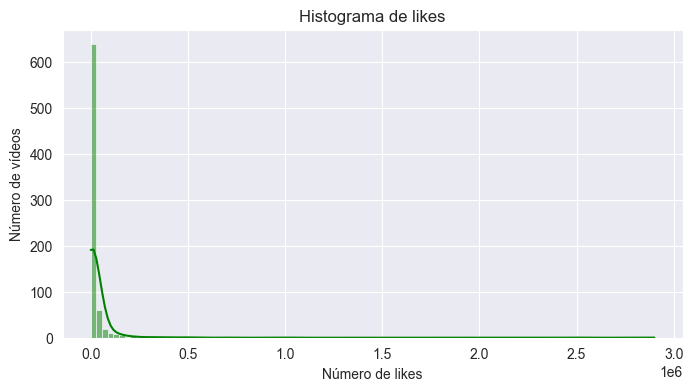

In [8]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.diggCount', bins=100, kde=True, color='green')
plt.title('Histograma de likes')
plt.xlabel('Número de likes')
plt.ylabel('Número de vídeos')


Text(0, 0.5, 'Número de vídeos')

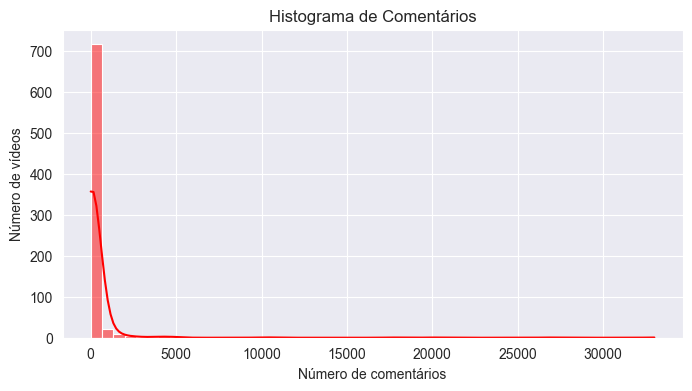

In [9]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.commentCount', bins=50, kde=True, color='red')
plt.title('Histograma de Comentários')
plt.xlabel('Número de comentários')
plt.ylabel('Número de vídeos')

Text(0, 0.5, 'Número de vídeos')

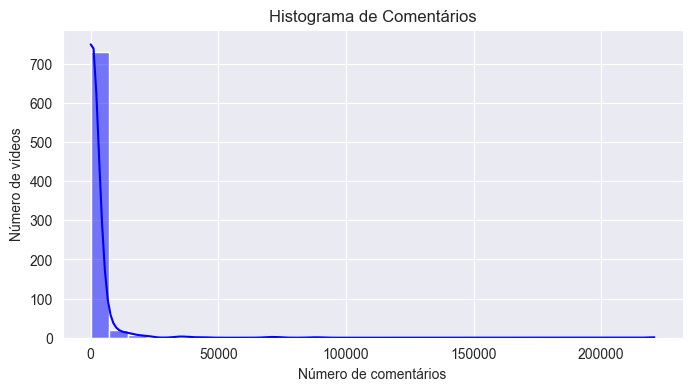

In [10]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='statsV2.shareCount', bins=30, kde=True, color='blue')
plt.title('Histograma de Comentários')
plt.xlabel('Número de comentários')
plt.ylabel('Número de vídeos')

Text(0, 0.5, 'Número de vídeos')

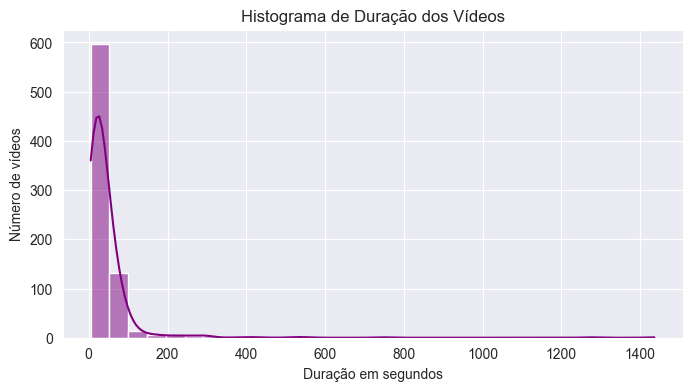

In [11]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=dados, x='video.duration', bins=30, kde=True, color='purple')
plt.title('Histograma de Duração dos Vídeos')
plt.xlabel('Duração em segundos')
plt.ylabel('Número de vídeos')

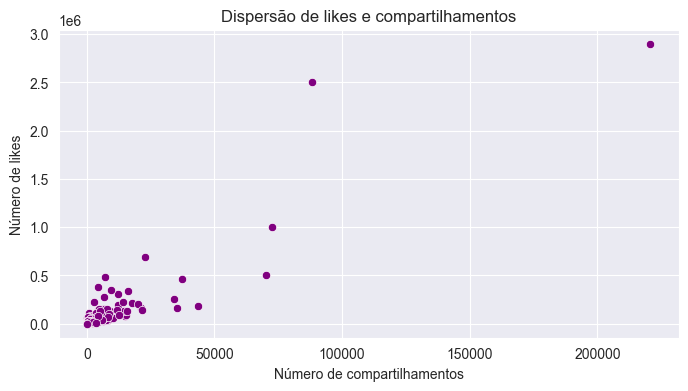

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')
plt.show()

(0.0, 400000.0)

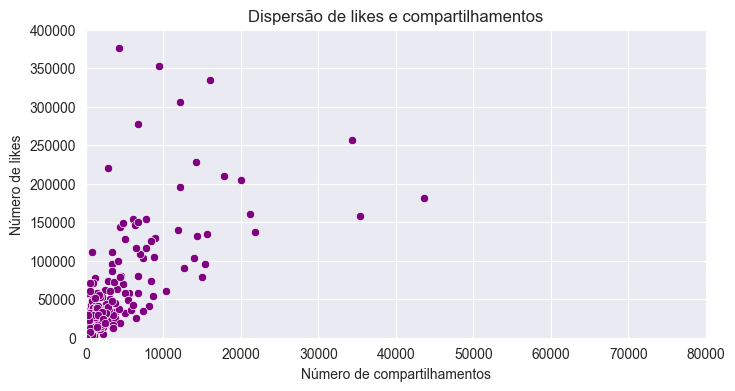

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')
plt.xlim(0, 80_000)
plt.ylim(0, 400_000)

Text(0, 0.5, 'Número de likes')

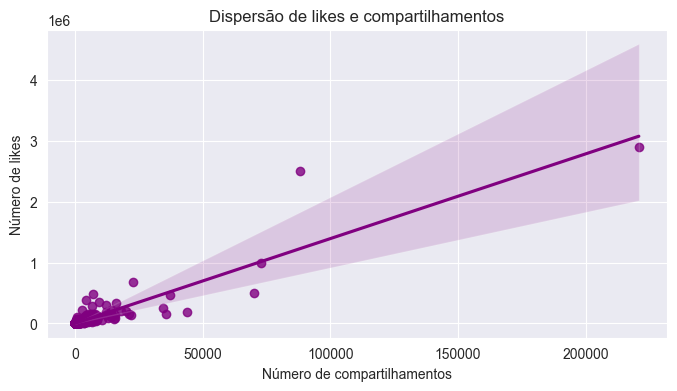

In [14]:
plt.figure(figsize=(8, 4))
sns.regplot(data=dados, x='statsV2.shareCount', y='statsV2.diggCount', color='purple')
plt.title('Dispersão de likes e compartilhamentos')
plt.xlabel('Número de compartilhamentos')
plt.ylabel('Número de likes')

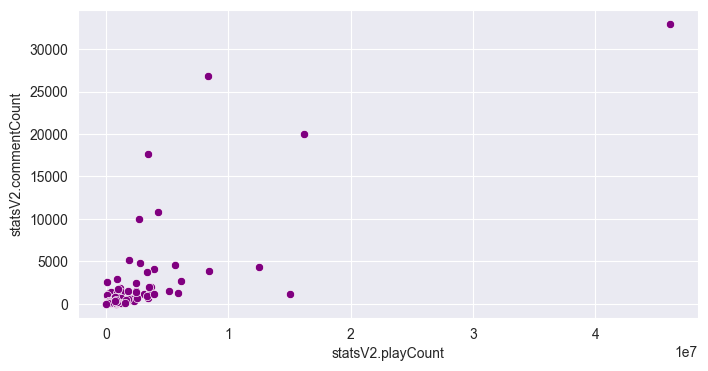

In [15]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados, x='statsV2.playCount', y='statsV2.commentCount', color='purple')
plt.show()

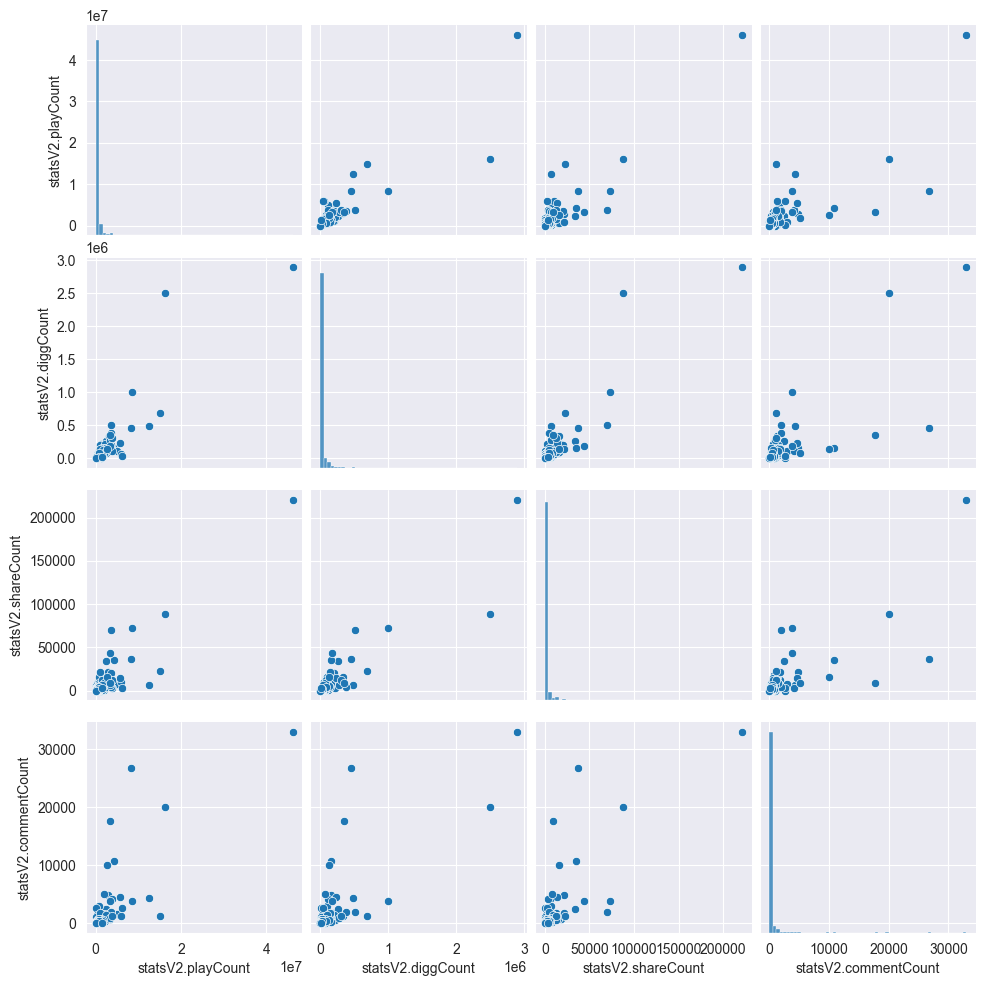

In [16]:
sns.pairplot(data=dados, vars=['statsV2.playCount', 'statsV2.diggCount', 'statsV2.shareCount', 'statsV2.commentCount'])


In [17]:
dados.groupby('author.uniqueId').agg({'statsV2.diggCount': 'mean',
                                        'statsV2.playCount': 'mean',
                                        'statsV2.shareCount': 'mean',
                                        'statsV2.commentCount': 'mean'}).sort_values(by='statsV2.diggCount', ascending=False).head(20)

,statsV2.diggCount,statsV2.playCount,statsV2.shareCount,statsV2.commentCount
author.uniqueId,,,,
paulkenton,2900000.0,46100000.0,220800.0,33000.0
i.am.walo,2500000.0,16200000.0,88200.0,20000.0
seainpalm,999000.0,8400000.0,72600.0,3814.0
warmplacee__,686300.0,15000000.0,22600.0,1152.0
kennygzinbjj,505300.0,3700000.0,70000.0,1968.0
jessicasabrina445,489000.0,12500000.0,6995.0,4363.0
miguel.0041,460200.0,8300000.0,37200.0,26800.0
mayaaadiaries,376600.0,3500000.0,4240.0,1987.0
kittenpawcreations,352800.0,3400000.0,9478.0,17700.0


## Se eu fosse quisesse contratar um influencer de Jiujitsu, quais influencers da lista eu usaria para fazer uma campanha de marketing em prol da minha empresa?

#### Tempo

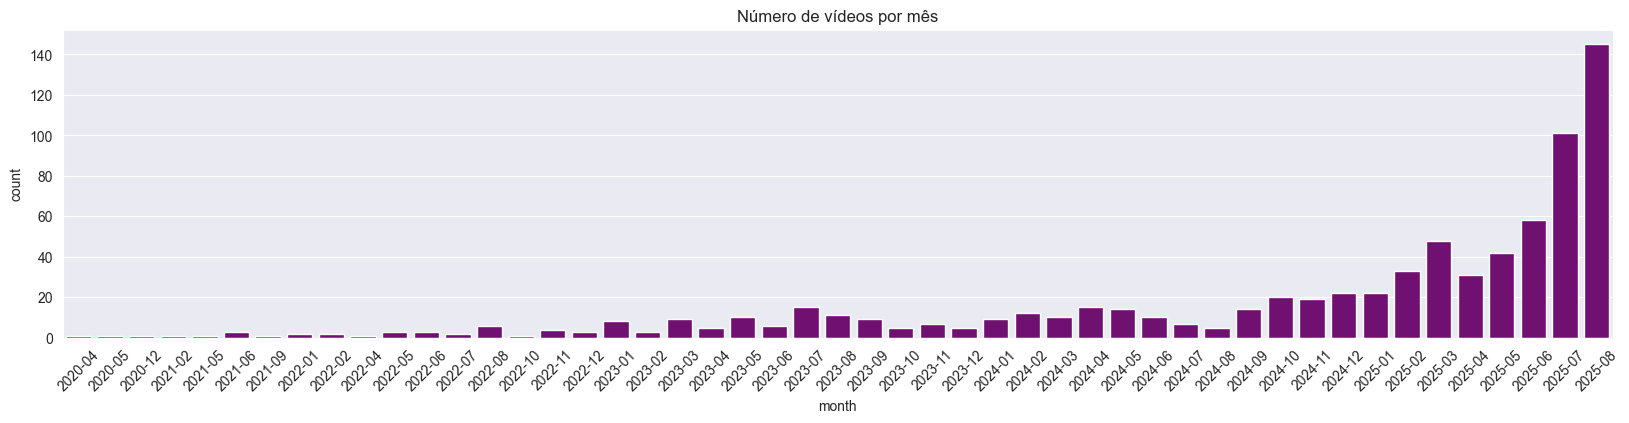

In [21]:
dados['month'] = dados['createTime'].dt.to_period('M')
plt.figure(figsize=(20, 4))
sns.countplot(x=dados.sort_values(by='month', ascending=True)['month'], color='purple')
plt.title('Número de vídeos por mês')
plt.xticks(rotation=45)
plt.show()

### Hashtags

In [22]:
def get_hashtags(lista):
  resultado = []
  try:
    for item in lista:
      resultado.append(item['title'])
    return resultado
  except:
    return resultado
  
dados['hashtags'] = dados['challenges'].apply(get_hashtags)

pd.DataFrame(Counter(dados['hashtags'].sum()).most_common(30))

,0,1
0,jiujitsu,592
1,bjj,351
2,jiujitsulifestyle,193
3,artesuave,178
4,brazilianjiujitsu,155
5,jiujitsugrappling,129
6,bjjlifestyle,113
7,fyp,109
8,oss,101
9,grappling,99


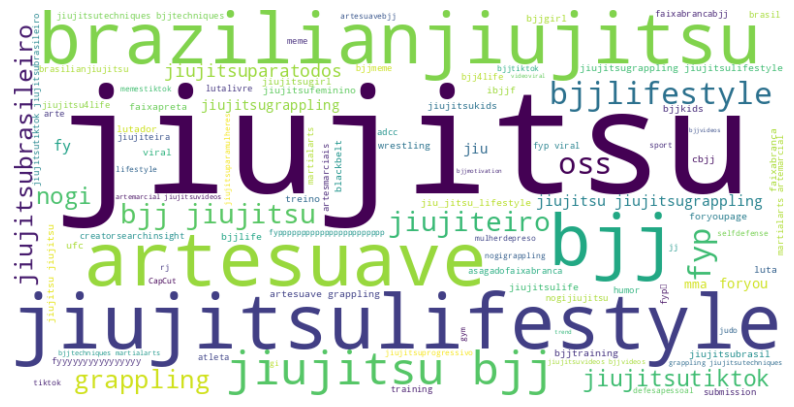

In [23]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, max_words=100, background_color='white').generate(' '.join(dados['hashtags'].sum()))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()